## Lecture Notes on Logistic Regression - from JosePotilla_UDEMY - Henric Jandoc

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

In [ ]:
# pip install SciencePlots

In [2]:
plt.style.use(['science', 'grid', 'notebook', 'no-latex'])

In [3]:
df = pd.read_csv('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\\hearing_test.csv')

In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

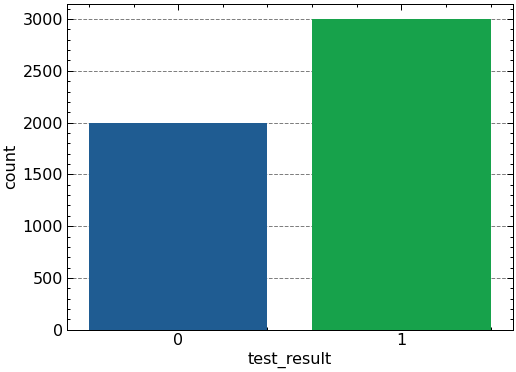

In [7]:
sns.countplot(data = df, x = 'test_result')

<AxesSubplot:xlabel='test_result', ylabel='age'>

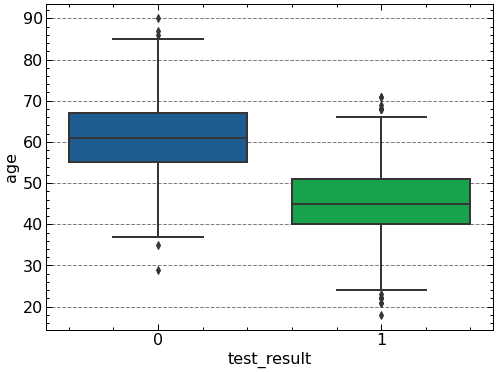

In [8]:
sns.boxplot(x = 'test_result', y = 'age', data = df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

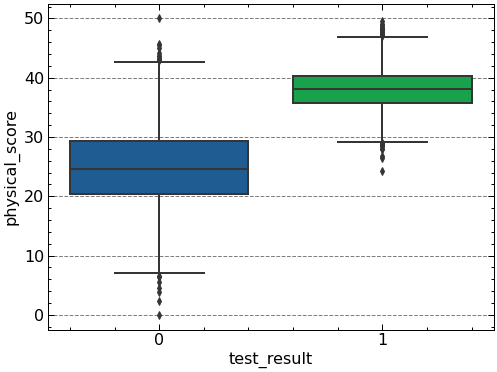

In [9]:
sns.boxplot(x = 'test_result', y = 'physical_score', data = df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

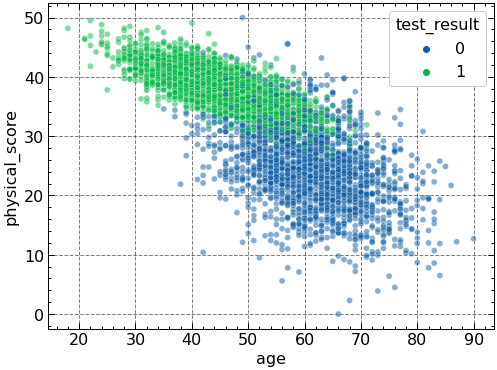

In [13]:
sns.scatterplot(x = 'age', y = 'physical_score', data = df, hue = 'test_result', alpha = 0.5)

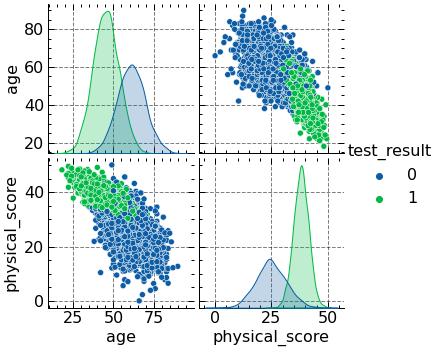

In [14]:
sns.pairplot(df, hue = 'test_result')

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

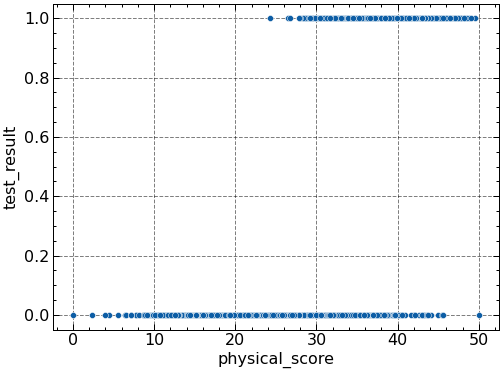

In [15]:
sns.scatterplot(x = 'physical_score', y = 'test_result', data = df)

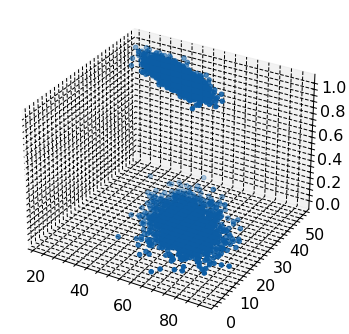

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'])

## Model Training with SkLearn

In [17]:
X = df.drop('test_result', axis = 1)

In [18]:
y = df['test_result']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.preprocessing import StandardScaler

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [23]:
scaler = StandardScaler()

In [24]:
scaled_X_train = scaler.fit_transform(X_train)

In [25]:
scaled_X_test = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# help(LogisticRegression)

In [28]:
log_model = LogisticRegression()

In [29]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [30]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [31]:
y_pred = log_model.predict(scaled_X_test)

In [32]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [33]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [34]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
y_pred = log_model.predict(scaled_X_test)

In [37]:
accuracy_score(y_test, y_pred)

0.93

In [38]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [39]:
from sklearn.metrics import plot_confusion_matrix

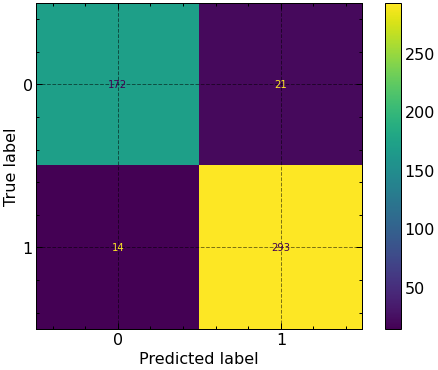

In [40]:
plot_confusion_matrix(log_model, scaled_X_test, y_test)

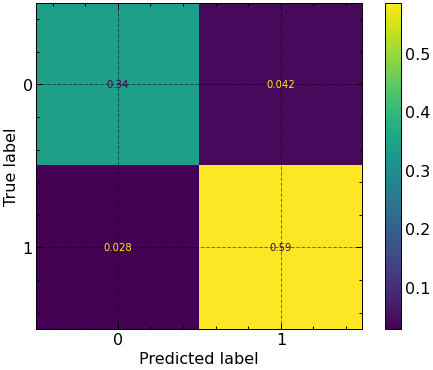

In [41]:
plot_confusion_matrix(log_model, scaled_X_test, y_test, normalize = 'all')

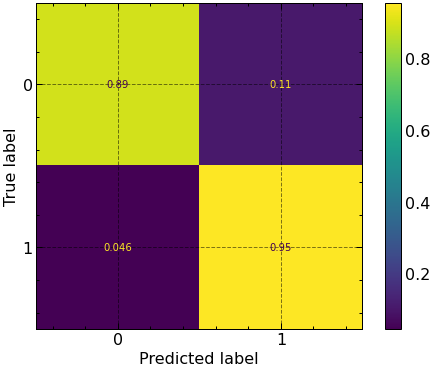

In [42]:
plot_confusion_matrix(log_model, scaled_X_test, y_test, normalize = 'true')

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [45]:
from sklearn.metrics import precision_score, recall_score

In [46]:
precision_score(y_test, y_pred)

0.9331210191082803

In [47]:
recall_score(y_test, y_pred)

0.9543973941368078

In [48]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

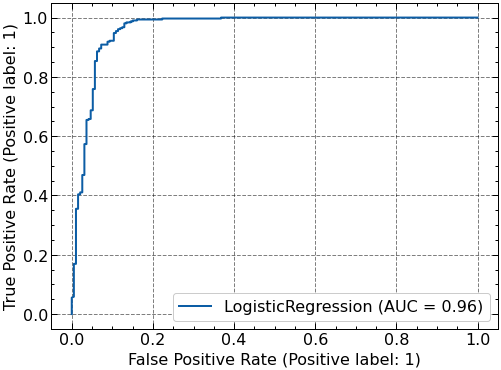

In [49]:
plot_roc_curve(log_model, scaled_X_test, y_test)

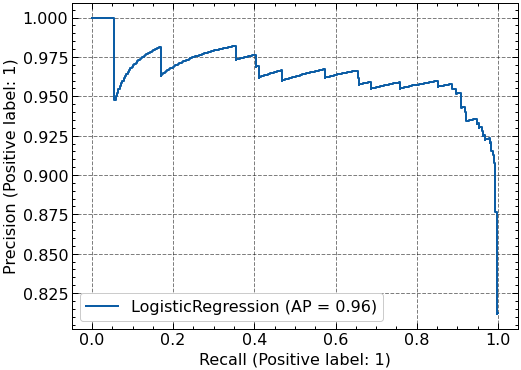

In [51]:
plot_precision_recall_curve(log_model, scaled_X_test, y_test)

## Logistic Regression for Multi-Class Classification

In [52]:
df = pd.read_csv('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\\iris.csv')

In [53]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [55]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [56]:
df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

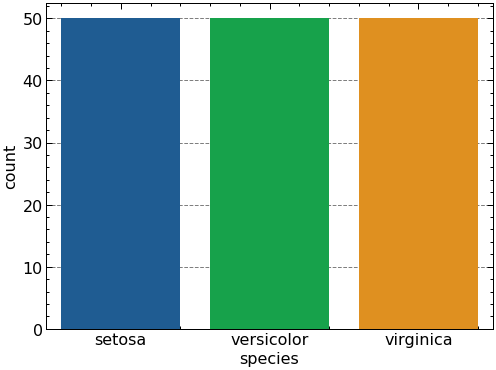

In [57]:
sns.countplot(x = 'species', data = df)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

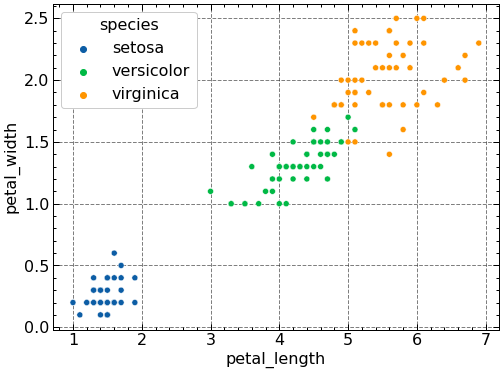

In [58]:
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = df, hue = 'species')

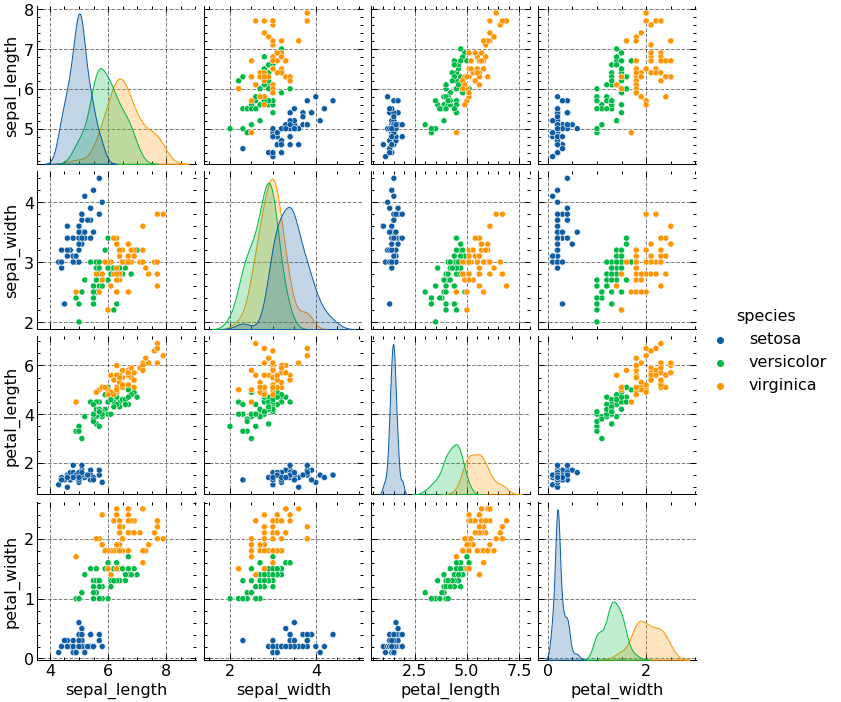

In [59]:
sns.pairplot(df, hue = 'species')

<AxesSubplot:>

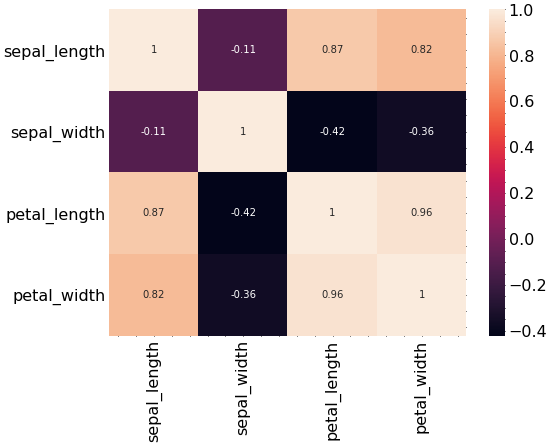

In [60]:
sns.heatmap(df.corr(), annot = True)

In [61]:
X = df.drop('species', axis =1)

In [62]:
y = df['species']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 101)

In [66]:
scaler = StandardScaler()

In [67]:
scaled_X_train = scaler.fit_transform(X_train)

In [68]:
scaled_X_test = scaler.transform(X_test)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
log_model = LogisticRegression(solver = 'saga', multi_class = 'ovr', max_iter = 5000)

In [72]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)

param_grid = {'penalty':penalty, 'l1_ratio': l1_ratio, 'C': C}

In [73]:
grid_model = GridSearchCV(log_model, param_grid = param_grid)

In [74]:
grid_model.fit(scaled_X_train, y_train)

C:\Users\henri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\henri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\henri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\henri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\henri\anaconda3\lib\sit

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [75]:
y_pred = grid_model.predict(scaled_X_test)

In [76]:
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [77]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [78]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

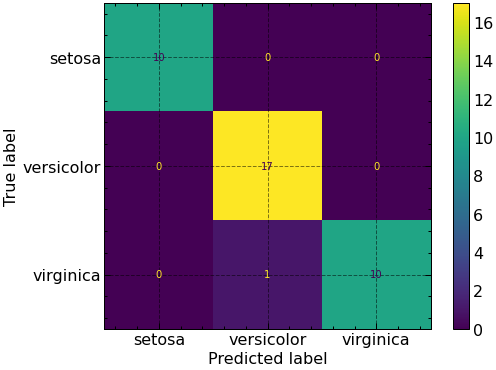

In [79]:
plot_confusion_matrix(grid_model, scaled_X_test, y_test)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

